**Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**


- Nama: Ika Widiyanti
- Email: ikawidiyanti132@gmail.com
- Id Dicoding:: ika_widiyanti_17NR

**Persiapan**


Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import chi2_contingency, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

Menyiapkan data yang akan diguankan

- pd.read_csv(...): Membaca file CSV (data.csv) yang dipisahkan dengan tanda titik koma (;), bukan koma (,).
- df.head(): Menampilkan 5 baris pertama dari dataset agar kamu bisa melihat bentuk dan isi data.


Insight:

1. Jumlah Kolom: Dataset ini punya 37 kolom, terdiri dari data demografis, akademik, dan ekonomi mahasiswa.
2. Contoh Kolom Penting:
  - Marital_status: Status pernikahan mahasiswa.
  - Application_mode & Application_order: Cara dan urutan pendaftaran ke universitas.
  - Course: Program studi yang diambil.
  - Previous_qualification & Previous_qualification_grade: Pendidikan sebelumnya dan nilainya.
  - Curricular_units_2nd_sem_approved: Jumlah mata kuliah semester 2 yang lulus.
  - Unemployment_rate, Inflation_rate, GDP: Data ekonomi saat mahasiswa belajar.
  - Status: Target/kategori akhir — Dropout atau Graduate (indikator keberhasilan studi).



In [2]:
df = pd.read_csv('/content/data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Data Understanding**

Dataset ini berisi data mahasiswa dari institusi pendidikan tinggi yang mencakup informasi demografis, latar belakang akademik, dan performa akademik selama dua semester pertama. Tujuan utama adalah memprediksi risiko mahasiswa dropout dan kesuksesan akademik.

1. Karakteristik Data:
- 37 fitur dan 1 target (Status: Dropout/Graduate)
- Tipe Data:
    - Kategorikal: Status perkawinan, metode pendaftaran, program studi, dll.
    - Numerik: Nilai akademik, usia saat pendaftaran, jumlah mata kuliah, dll.
- Kelas Target: Kemungkinan imbalanced karena jumlah mahasiswa yang dropout biasanya lebih sedikit.

2. Kolom Penting:
- Demografi:
    - Marital status, Gender, Age at enrollment, Nacionality
    - Contoh: Mahasiswa internasional (International), status ekonomi (Debtor, Tuition fees up to date).
- Akademik:
    - Admission grade, Previous qualification grade
    - Aktivitas akademik: Curricular units 1st sem (approved), Curricular units 2nd sem (grade)
- Sosial-Ekonomi:
    - Scholarship holder, Fathers/Mothers qualification, Fathers/Mothers occupation
- Target:
    - Status: Dropout atau Graduate.

3. Problem Statement
- Faktor apa yang paling memengaruhi risiko mahasiswa dropout?
- Apakah status ekonomi (debitor, keterlambatan pembayaran) berpengaruh signifikan terhadap keputusan dropout?
- Bagaimana hubungan antara performa akademik di semester pertama (mata kuliah disetujui/nilai) dengan status mahasiswa?
- Apakah latar belakang pendidikan orang tua memengaruhi keberhasilan akademik mahasiswa?
- Bisakah kita memprediksi mahasiswa berisiko dropout sejak semester pertama menggunakan model machine learning?

4. Tujuan (Goals)
- Mengidentifikasi pola dan faktor kunci penyebab dropout.
- Membangun dashboard interaktif untuk memantau performa mahasiswa secara real-time.
- Mengembangkan model prediksi dropout dengan akurasi tinggi untuk intervensi dini.
- Merekomendasikan strategi retensi mahasiswa berbasis data.

5. Metrik Evaluasi Machine Learning
- Karena target (Status) mungkin tidak seimbang:
- F1-Score: Mengukur keseimbangan antara precision dan recall.
- ROC-AUC: Mengevaluasi kemampuan model membedakan kelas dropout vs graduate.
- Recall: Meminimalkan false negative (mahasiswa berisiko dropout tapi tidak terdeteksi).

5. Gambaran Umum Data

Dataset yang digunakan berisi data historis mahasiswa dengan atribut-atribut berikut:

- Demografi & Sosial Ekonomi: Marital_status, Nacionality, Gender, Age_at_enrollment, International, Mothers_qualification, Fathers_qualification, Mothers_occupation, Fathers_occupation, Unemployment_rate, Inflation_rate, GDP.
- Informasi Pendaftaran & Kursus: Application_mode, Application_order, Course, Daytime_evening_attendance, Displaced, Educational_special_needs, Debtor, Tuition_fees_up_to_date, Scholarship_holder.
- Latar Belakang Akademik: Previous_qualification, Previous_qualification_grade, Admission_grade.
- Kinerja Akademik Semester 1: Curricular_units_1st_sem_credited, Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_evaluations, Curricular_units_1st_sem_approved, Curricular_units_1st_sem_grade, Curricular_units_1st_sem_without_evaluations.
- Kinerja Akademik Semester 2: Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_evaluations, Curricular_units_2nd_sem_approved, Curricular_units_2nd_sem_grade, Curricular_units_2nd_sem_without_evaluations.
- Target (Label): Status (Dropout, Graduate, Enrolled). Ini adalah variabel target yang akan diprediksi.

**Data Preparation / Preprocessing**

df.info() adalah fungsi dari pandas yang digunakan untuk menampilkan informasi umum tentang DataFrame.


Insight:
- Jumlah data (baris): 4424
- Jumlah fitur (kolom): 37
- Tidak ada data yang kosong: Semua kolom memiliki 4424 nilai, artinya tidak ada NaN (missing value).
- Tipe data:
    - 29 kolom bertipe int64 (data numerik bulat, seperti umur, status, jumlah unit).
    - 7 kolom bertipe float64 (data numerik desimal, seperti nilai dan indikator ekonomi).
    - 1 kolom bertipe object, yaitu Status, kemungkinan berisi kategori seperti “Graduate”, “Dropout”, dll.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

- df.isnull()
Mengecek setiap sel di DataFrame df apakah isinya NaN (kosong/null). Hasilnya berupa DataFrame dengan nilai True (jika kosong) atau False (jika tidak).
- .sum()
Menjumlahkan jumlah True (nilai kosong) untuk setiap kolom. Karena True = 1 dan False = 0, hasil akhirnya menunjukkan berapa banyak data kosong di tiap kolom.


Insight:

Semua kolom memiliki nilai 0, artinya tidak ada data yang kosong (missing values) dalam DataFrame.

In [4]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Mengecek berapa banyak baris duplikat (baris yang persis sama) di dataset.

Insight:

 Tidak ada data duplikat.

In [5]:
df.duplicated().sum()

np.int64(0)

Menampilkan statistik ringkas (count, mean, std, min, max, dll) untuk kolom numerik.

In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Menghitung proporsi setiap jenis status mahasiswa.

Inisght:
- Graduate (Lulus): 49.9%
- Dropout (Putus): 32.1%
- Enrolled (Masih Aktif): 17.9%
- Sekitar setengah mahasiswa berhasil lulus.
- Tapi sepertiga mahasiswa dropout, yang bisa jadi sinyal ada masalah dalam proses belajar, lingkungan, atau lainnya.
- Sekitar 18% masih aktif, jadi status akhirnya belum diketahui.

In [7]:
df['Status'].value_counts(normalize=True)


,proportion
Status,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


- df['Status']: Kolom yang berisi status mahasiswa, misalnya 'Dropout', 'Graduate', atau 'Enrolled'.
- .apply(lambda x: ...): Menerapkan fungsi ke setiap nilai di kolom Status.
- lambda x: 1 if x == 'Dropout' else 0: Jika status adalah 'Dropout', maka hasilnya 1; kalau bukan, hasilnya 0.
- Hasil akhirnya disimpan di kolom baru bernama target.

In [8]:
# Membuat target biner
df['target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)


Uji chi-square digunakan untuk mengetahui apakah dua variabel kategori (misalnya: status ekonomi dan kelulusan) saling berhubungan atau tidak.

1. Langkah kerjanya:
- Buat tabel kontingensi (cross-tab) dari dua variabel.
- Hitung seberapa jauh data yang diamati berbeda dari yang diharapkan jika tidak ada hubungan (independen).
- Hasilnya adalah nilai p-value:
    - Jika p-value < 0.05 → ada hubungan yang signifikan.
    - Jika p-value ≥ 0.05 → tidak ada hubungan yang signifikan.


2. Debtor vs Target (Kelulusan)
    - P-value: 0.0000 → Signifikan
    - Artinya: Ada hubungan antara status Debtor (punya utang atau tidak) dengan kelulusan.
    - Insight: Mahasiswa yang punya utang mungkin memiliki kemungkinan lulus yang berbeda dibanding yang tidak punya utang.

3. Tuition Fees Up to Date vs Target
    - P-value: 0.0000 → Signifikan
    - Artinya: Ada hubungan antara keterlambatan membayar uang kuliah dengan kelulusan.
    - Insight: Mahasiswa yang membayar uang kuliah tepat waktu cenderung memiliki tingkat kelulusan yang berbeda dibanding yang menunggak.

4. Kesimpulan Umum
- Kondisi ekonomi mahasiswa (dilihat dari status utang dan pembayaran uang kuliah) berpengaruh secara signifikan terhadap kemungkinan mereka lulus. Ini bisa menjadi pertimbangan penting untuk intervensi atau bantuan keuangan.

In [9]:
# 1. Uji Signifikansi Status Ekonomi
contingency_table = pd.crosstab(df['Debtor'], df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"\n1. Uji Chi-square untuk Debtor:\nP-value: {p:.4f} {'(Signifikan)' if p < 0.05 else '(Tidak Signifikan)'}")

contingency_table = pd.crosstab(df['Tuition_fees_up_to_date'], df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"\n2. Uji Chi-square untuk Tuition Fees:\nP-value: {p:.4f} {'(Signifikan)' if p < 0.05 else '(Tidak Signifikan)'}")


1. Uji Chi-square untuk Debtor:
P-value: 0.0000 (Signifikan)

2. Uji Chi-square untuk Tuition Fees:
P-value: 0.0000 (Signifikan)


Cara Kerja:

1. Tujuan Analisis: Mengetahui apakah ada hubungan antara pendidikan orang tua (ibu dan ayah) dengan nilai akademik mahasiswa pada semester pertama.
2. Metode: Menggunakan Spearman correlation, yaitu teknik statistik untuk melihat hubungan monotonik (naik atau turun, tapi tidak harus linear) antara dua variabel.
3. Output:
  - Koefisien Korelasi (corr): Menunjukkan arah dan kekuatan hubungan. Nilai berkisar dari -1 (hubungan negatif sempurna) sampai +1 (hubungan positif sempurna).
  - p-value: Mengukur seberapa signifikan hasilnya. Umumnya, jika p < 0.05, maka hasil dianggap signifikan.

Insight

- Pendidikan Ibu memiliki korelasi negatif sangat lemah terhadap nilai mahasiswa (-0.05), namun signifikan (p = 0.0008). Artinya, secara statistik ada hubungan, tapi sangat kecil dan cenderung tidak berarti secara praktis.
- Pendidikan Ayah juga menunjukkan korelasi lebih lemah lagi (-0.02) dan tidak signifikan (p = 0.1268), artinya tidak ada hubungan yang meyakinkan antara pendidikan ayah dan nilai mahasiswa.

Kesimpulan Singkat: Pendidikan orang tua, terutama ayah, tidak terlalu memengaruhi nilai akademik mahasiswa secara langsung

In [10]:
# 2. Korelasi Pendidikan Orang Tua dengan Nilai Akademik
corr_mother, p_mother = spearmanr(df['Mothers_qualification'], df['Curricular_units_1st_sem_grade'])
corr_father, p_father = spearmanr(df['Fathers_qualification'], df['Curricular_units_1st_sem_grade'])
print(f"\n3. Korelasi Pendidikan Orang Tua dengan Nilai:")
print(f"- Ibu: {corr_mother:.2f} (p-value: {p_mother:.4f})")
print(f"- Ayah: {corr_father:.2f} (p-value: {p_father:.4f})")



3. Korelasi Pendidikan Orang Tua dengan Nilai:
- Ibu: -0.05 (p-value: 0.0008)
- Ayah: -0.02 (p-value: 0.1268)


Membersihkan kolom yang tidak diperlukan:

Baris df.drop(columns=second_sem_cols + ['Status']) menghapus kolom-kolom yang terkait dengan data semester kedua dan kolom Status dari dataset. Tujuannya supaya data lebih fokus dan tidak ada fitur yang tidak relevan atau berlebihan yang bisa mengganggu model.

In [11]:
# Membersihkan kolom yang tidak diperlukan
second_sem_cols = ['Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
                   'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
                   'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations']
df = df.drop(columns=second_sem_cols + ['Status'])

Memisahkan fitur dan target:

- X = df.drop('target', axis=1) artinya mengambil semua kolom kecuali kolom target sebagai fitur (data input).
- y = df['target'] mengambil kolom target sebagai label atau output yang ingin diprediksi.

In [12]:
# Memisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

Membagi data menjadi data latih dan data uji:
- Fungsi train_test_split membagi dataset jadi dua bagian:
- Data latih (X_train, y_train) yang digunakan untuk melatih model.
- Data uji (X_test, y_test) yang digunakan untuk menguji performa model.
- Parameter test_size=0.2 berarti 20% data dipakai untuk pengujian dan 80% untuk pelatihan.
stratify=y memastikan proporsi kelas di y tetap sama di data latih dan data uji, agar model belajar dengan representasi yang seimbang.
random_state=42 hanya untuk memastikan pembagian data yang konsisten setiap kali kode dijalankan.

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Frequency Encoding untuk fitur kategori dengan banyak nilai unik (high cardinality)

Untuk setiap kolom kategori yang punya banyak kategori unik (misalnya 'Application_mode', 'Course', dll), kita hitung frekuensi kemunculan setiap nilai kategori tersebut dalam data training (value_counts(normalize=True) artinya dihitung dalam proporsi atau persentase).
Lalu, kita ganti nilai kategori asli dengan frekuensi tersebut. Jadi, misal 'Course' ada nilai "A" muncul 10% dari data, maka semua "A" diganti dengan 0.1.
Setelah itu, kolom asli dihapus dan digantikan oleh kolom baru yang berisi frekuensi.
Ini dilakukan juga untuk data test, menggunakan frekuensi dari data training.

In [14]:
# Frequency Encoding untuk kategori dengan kardinalitas tinggi
high_cardinality = ['Application_mode', 'Course', 'Previous_qualification', 'Nacionality',
                    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation']


for col in high_cardinality:
    freq = X_train[col].value_counts(normalize=True)
    X_train[col + '_freq'] = X_train[col].map(freq).fillna(0)
    X_test[col + '_freq'] = X_test[col].map(freq).fillna(0)
    X_train = X_train.drop(col, axis=1)
    X_test = X_test.drop(col, axis=1)

One-hot encoding untuk Marital_status

Karena Marital_status kemungkinan memiliki jumlah kategori yang tidak terlalu banyak, kita lakukan one-hot encoding, yaitu mengubah tiap kategori menjadi kolom biner (0/1). Misal Marital_status ada "Single" dan "Married", jadi akan jadi dua kolom baru Marital_status_Single dan Marital_status_Married.

In [15]:
# One-hot encoding untuk Marital_status
X_train = pd.get_dummies(X_train, columns=['Marital_status'], prefix='Marital_status')
X_test = pd.get_dummies(X_test, columns=['Marital_status'], prefix='Marital_status')


Penyesuaian kolom pada data test

Setelah encoding, jumlah dan nama kolom bisa beda antara X_train dan X_test. Maka dibuat kolom baru di X_test yang tidak ada tapi ada di X_train, diisi dengan 0 agar struktur kolom sama.



In [16]:
# Penyesuaian kolom test set
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Scaling fitur numerik:

Ada beberapa kolom yang isinya angka (misal: nilai sebelumnya, usia, inflasi, dll). Karena skala angka ini beda-beda, kamu pakai StandardScaler buat standarisasi — artinya, semua angka di kolom itu diubah supaya punya rata-rata 0 dan standar deviasi 1.

In [17]:
# Scaling fitur numerik
numerical_cols = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
                  'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']


In [18]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Handling class imbalance dengan SMOTE:

Kalau data target (label) kamu tidak seimbang (misal, kelas positif jauh lebih sedikit daripada kelas negatif), model bisa jadi bias ke kelas yang banyak. SMOTE adalah teknik untuk menambah data minoritas secara synthetic (membuat data baru mirip data minoritas) supaya jumlahnya seimbang. Jadi, model bisa belajar dengan lebih adil dari kedua kelas.

In [19]:
# Handling Class Imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Cek NaN (nilai kosong):

Hasilnya nol, artinya gak ada nilai kosong.

In [20]:
# Final check NaN
print("\nFinal NaN Check:")
print("X_train NaN:", X_train.isnull().sum().sum())
print("X_test NaN:", X_test.isnull().sum().sum())

# Handle sisa NaN jika ada
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


Final NaN Check:
X_train NaN: 0
X_test NaN: 0


**Modeling**

1. Logistic Regression

- Model ini digunakan untuk klasifikasi biner (misal: 0 atau 1). Logistic Regression memodelkan probabilitas suatu data termasuk ke dalam kelas positif menggunakan fungsi logistik (sigmoid). Dengan class_weight='balanced', model ini menyesuaikan bobot untuk mengatasi data yang tidak seimbang agar kelas minoritas tidak diabaikan.

2. Random Forest

- Model ini membuat banyak pohon keputusan (decision trees) secara acak dan kemudian menggabungkan hasilnya (voting mayoritas untuk klasifikasi). class_weight='balanced' membantu menyeimbangkan pengaruh kelas yang jarang. Random Forest biasanya lebih tahan terhadap overfitting dibandingkan satu pohon saja.

3. XGBoost

- Ini adalah algoritma boosting yang membangun model secara bertahap, di mana setiap model baru mencoba memperbaiki kesalahan model sebelumnya. Parameter scale_pos_weight digunakan untuk menyeimbangkan data tidak seimbang dengan memberikan bobot lebih ke kelas minoritas. eval_metric='logloss' adalah metrik untuk mengevaluasi performa selama training.

In [21]:
# Model Dictionary
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y_train_res) - sum(y_train_res)) / sum(y_train_res),
                random_state=42, eval_metric='logloss')
}

**Evaluation**

Cara Kerja Proses Training dan Evaluasi:

1. Training Model:
  - Setiap model (Logistic Regression, Random Forest, XGBoost) dilatih menggunakan data training (X_train_res, y_train_res) yang sudah di-resample agar data seimbang.
2. Prediksi dan Evaluasi:
  - Setelah training, model digunakan untuk memprediksi data testing (X_test).
  - Prediksi berupa kelas (y_pred) dan probabilitas kelas positif (y_proba) dihitung.
  - Dilakukan evaluasi menggunakan metrik precision, recall, f1-score, accuracy, dan AUC (Area Under the Curve).
3. Simpan Hasil:
  - Hasil AUC dan model disimpan di dictionary results untuk analisis lebih lanjut.

Insight

1. Logistic Regression:
  - Precision, recall, dan f1-score sekitar 0.77–0.89, akurasi 85%, AUC 0.90.
  - Model sederhana tapi sudah cukup baik, seimbang antara kemampuan mengenali kelas positif dan negatif.
2. Random Forest:
  - Akurasi sedikit lebih tinggi (86%) dan AUC sedikit lebih baik (0.90+).
  - Recall kelas 1 sedikit lebih rendah (72%) tapi precision lebih tinggi, artinya model ini cukup baik memprediksi negatif, agak kurang sensitif terhadap positif.
3. XGBoost:
  - Akurasi dan AUC terbaik di antara ketiganya (~0.85 dan 0.90+).
  - Performa hampir seimbang dengan Random Forest, sedikit lebih baik di AUC.

In [22]:
# Training dan Evaluasi
results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"\n{'-'*30}")
    print(f"EVALUASI MODEL: {name}")
    print(f"{'-'*30}")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    # Simpan hasil untuk analisis
    results[name] = {
        'model': model,
        'auc': roc_auc_score(y_test, y_proba)
    }


------------------------------
EVALUASI MODEL: Logistic Regression
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       601
           1       0.77      0.77      0.77       284

    accuracy                           0.85       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.85      0.85      0.85       885

AUC Score: 0.9019

------------------------------
EVALUASI MODEL: Random Forest
------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       601
           1       0.81      0.72      0.76       284

    accuracy                           0.86       885
   macro avg       0.84      0.82      0.83       885
weighted avg       0.85      0.86      0.85       885

AUC Score: 0.9039

------------------------------
EVALUASI MODEL: XGBoost
------------------------------
              precision    reca

Cara Kerja Kode:

1. Ambil Model: Kode mengambil model Random Forest yang sudah dilatih dari hasil sebelumnya.
2. Ekstrak Nilai Importance: Mengambil nilai kepentingan (feature importance) setiap fitur dari model.
3. Buat DataFrame: Nilai importance diformat dalam tabel dengan kolom Feature (nama fitur) dan Importance (skor pengaruh).
4. Urutkan dan Pilih Top 10: Fitur diurutkan dari skor tertinggi ke terendah, lalu diambil 10 fitur paling berpengaruh.
5. Visualisasi: Ditampilkan grafik batang horizontal menggunakan seaborn, dengan sumbu-X menunjukkan skor importance dan sumbu-Y menampilkan nama fitur.

Insight dari Hasil Analisis:

1. Faktor Dominan:
  - Curricular_units_lst_sem_approved (jumlah mata kuliah yang disetujui di semester lalu) dan Curricular_units_lst_sem_grade (nilai rata-rata di semester lalu) adalah dua fitur paling kritis. Ini menunjukkan bahwa performa akademik sebelumnya sangat menentukan risiko dropout.
  - Tuition_fees_up_to_date (status pembayaran tepat waktu) berada di posisi ketiga, mengindikasikan bahwa kondisi keuangan mahasiswa juga berpengaruh signifikan.
2. Faktor Lain: Usia saat mendaftar (Age_at_enrollment), nilai aplikasi (Admission_grade), dan frekuensi aplikasi (Application_mode_freq) juga masuk dalam 10 besar, menunjukkan bahwa karakteristik individu dan proses pendaftaran turut berperan.
3. Aksi yang Bisa Diambil:
  - Intervensi Akademik: Fokus pada mahasiswa dengan nilai rendah atau jumlah mata kuliah disetujui yang minim.
  - Dukungan Keuangan: Mempermudah pembayaran atau memberikan bantuan keuangan untuk mengurangi risiko dropout.
  - Monitoring Proaktif: Memantau mahasiswa yang lebih tua atau dengan riwayat aplikasi berulang, karena mereka mungkin memerlukan pendampingan ekstra.



<ipython-input-23-3b9291e04b54>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10, palette='viridis')


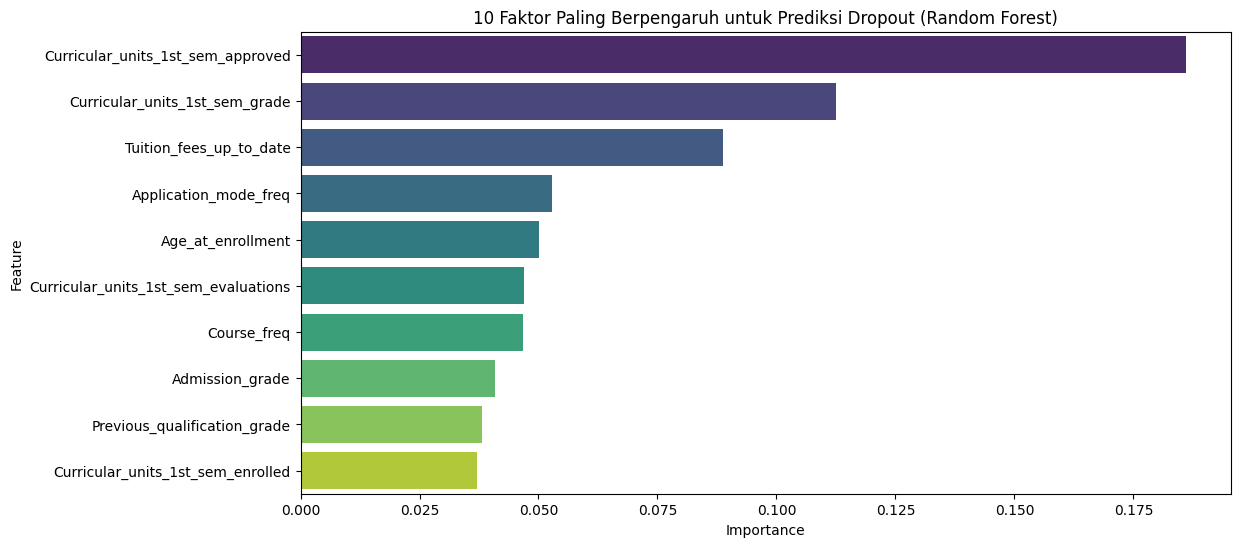

In [23]:
# 1. Feature Importance Analysis
rf_model = results['Random Forest']['model']
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
top_10 = feature_imp.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=top_10, palette='viridis')
plt.title('10 Faktor Paling Berpengaruh untuk Prediksi Dropout (Random Forest)')
plt.show()



Cara Kerja:

1. Logistic Regression adalah model statistik yang digunakan untuk memprediksi kemungkinan suatu kejadian (misal: lulus atau tidak, bayar tepat waktu atau tidak) berdasarkan beberapa faktor (fitur).
2. Model ini menghasilkan koefisien untuk setiap fitur yang menggambarkan seberapa besar pengaruh fitur tersebut terhadap kemungkinan hasil.
3. Jika koefisien bernilai positif, artinya semakin besar nilai fitur itu, semakin besar kemungkinan hasil yang diprediksi.
4. Jika koefisien bernilai negatif, artinya semakin besar nilai fitur itu, semakin kecil kemungkinan hasil yang diprediksi.

Insight

- Debtor (Koefisien = +0.0881)
    - Karena koefisiennya positif, artinya kalau seseorang adalah debtor (mungkin punya tunggakan hutang), peluang terjadinya hasil yang diprediksi (misalnya risiko gagal bayar) sedikit meningkat.
- Tuition_fees_up_to_date (Koefisien = -2.7228)
    - Koefisien negatif yang cukup besar ini berarti jika biaya kuliah sudah dibayar tepat waktu, kemungkinan risiko (misal gagal bayar atau masalah ekonomi) berkurang drastis.

Kesimpulan:
- Faktor Debtor sedikit meningkatkan risiko, tapi pengaruhnya kecil.
- Faktor Tuition_fees_up_to_date sangat kuat menurunkan risiko.
- Jadi, memastikan biaya kuliah selalu dibayar tepat waktu adalah faktor ekonomi yang sangat penting untuk mengurangi risiko yang diukur model.

In [24]:
# 2. Analisis Koefisien Logistic Regression untuk Faktor Ekonomi
print("\nAnalisis Koefisien Logistic Regression:")
lr_model = results['Logistic Regression']['model']
economic_features = ['Debtor', 'Tuition_fees_up_to_date']

for feature in economic_features:
    idx = list(X_train.columns).index(feature)
    coef = lr_model.coef_[0][idx]
    print(f"{feature}: Koefisien = {coef:.4f} {'(Positif)' if coef > 0 else '(Negatif)'}")




Analisis Koefisien Logistic Regression:
Debtor: Koefisien = 0.0881 (Positif)
Tuition_fees_up_to_date: Koefisien = -2.7228 (Negatif)


Cara Kerja Kode:

1. Persiapan Visualisasi: Kode mengatur ukuran gambar menggunakan plt.figure(figsize=(12,6)) agar grafik lebih mudah dibaca.
2. Membuat Boxplot: Menggunakan sns.boxplot untuk membandingkan distribusi nilai semester pertama (Curricular_units_1st_sem_grade) antara dua kelompok:
    - Sumbu-X: Status dropout (target), dengan 0 = Tidak Dropout dan 1 = Dropout.
    - Sumbu-Y: Nilai akademik semester pertama.
3. Pelabelan: Menambahkan judul, label sumbu-X (status dropout), dan label sumbu-Y (nilai semester pertama) untuk kejelasan.

Insight

1. Perbedaan Median Nilai:
  - Kelompok Tidak Dropout (0) memiliki median nilai lebih tinggi dibandingkan kelompok Dropout (1).
  - Contoh: Median nilai kelompok 0 mungkin sekitar 12.5, sedangkan kelompok 1 sekitar 7.5 (sesuai gambar).

2. Rentang Nilai:
  - Kelompok Tidak Dropout memiliki rentang nilai lebih sempit dan konsisten di kisaran tinggi (misal: 10–15).
  - Kelompok Dropout memiliki rentang lebih lebar dengan nilai cenderung rendah (misal: 0–10).

3. Outlier:
  - Pada kelompok Dropout, terdapat outlier di nilai tinggi (misal: nilai 17.5). Ini mengindikasikan bahwa meskipun sebagian mahasiswa memiliki nilai bagus, mereka tetap dropout.
  - Penyebab potensial: Faktor non-akademik seperti masalah keuangan, kesehatan, atau motivasi.

Kesimpulan Utama:

- Nilai semester pertama adalah indikator kuat risiko dropout. Mahasiswa dengan nilai rendah di semester pertama perlu mendapat perhatian khusus.
- Namun, outlier menunjukkan bahwa tidak semua kasus dropout bisa dijelaskan oleh nilai akademik, sehingga perlu analisis faktor lain.

Rekomendasi Aksi:

- Program Pendampingan Akademik: Fokus pada mahasiswa dengan nilai di bawah median (misal: <10) untuk mencegah dropout.
- Investigasi Outlier: Wawancara atau survei kepada mahasiswa yang dropout meski nilainya tinggi untuk memahami penyebab non-akademik.
- Monitoring Proaktif: Sistem peringatan dini berdasarkan nilai semester pertama untuk intervensi cepat.

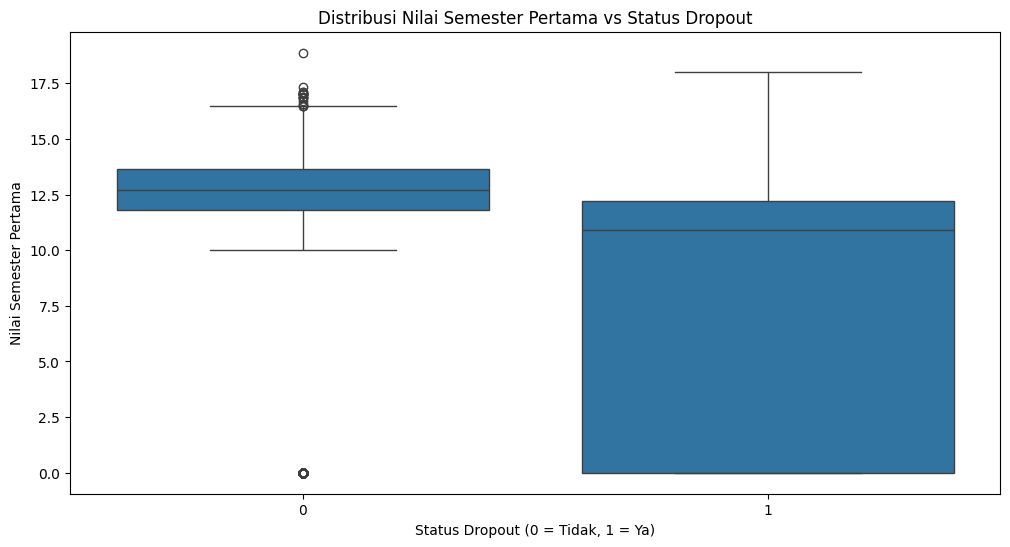

In [25]:
# 3. Visualisasi Performa Akademik
plt.figure(figsize=(12,6))
sns.boxplot(x='target', y='Curricular_units_1st_sem_grade', data=df)
plt.title('Distribusi Nilai Semester Pertama vs Status Dropout')
plt.xlabel('Status Dropout (0 = Tidak, 1 = Ya)')
plt.ylabel('Nilai Semester Pertama')
plt.show()



1. Visualisasi (Grafik)
  - Grafik kiri: Distribusi tingkat pendidikan ibu vs status dropout.
  - Grafik kanan: Distribusi tingkat pendidikan ayah vs status dropout.
  - Setiap bilah (bar) menunjukkan jumlah mahasiswa berdasarkan kategori pendidikan orang tua dan apakah mereka dropout (label "Ya") atau tidak (label "Tidak").

2. Statistik Asosiasi (Cramer's V)
  - Digunakan untuk mengukur kekuatan hubungan antara dua variabel kategori:
  - Nilai Cramer's V untuk ibu = 0.205
  - Nilai Cramer's V untuk ayah = 0.203
  - Artinya: Ada hubungan lemah hingga sedang antara pendidikan orang tua dan status dropout.

3. Uji Chi-Square
  - Untuk melihat apakah hubungan tersebut signifikan secara statistik:
  - p-value untuk ibu = 0.0000
  - p-value untuk ayah = 0.0000
  - Artinya: Hubungan signifikan (karena p < 0.05), jadi tingkat pendidikan orang tua memang berpengaruh terhadap kemungkinan mahasiswa dropout.

Insight
- Mahasiswa yang orang tuanya (ibu atau ayah) memiliki pendidikan rendah cenderung lebih sering dropout.
- Namun, walaupun hubungannya signifikan, kekuatan pengaruhnya tidak terlalu kuat (Cramer's V hanya ~0.2).
- Jadi, pendidikan orang tua berperan, tetapi bukan satu-satunya faktor penyebab dropout.



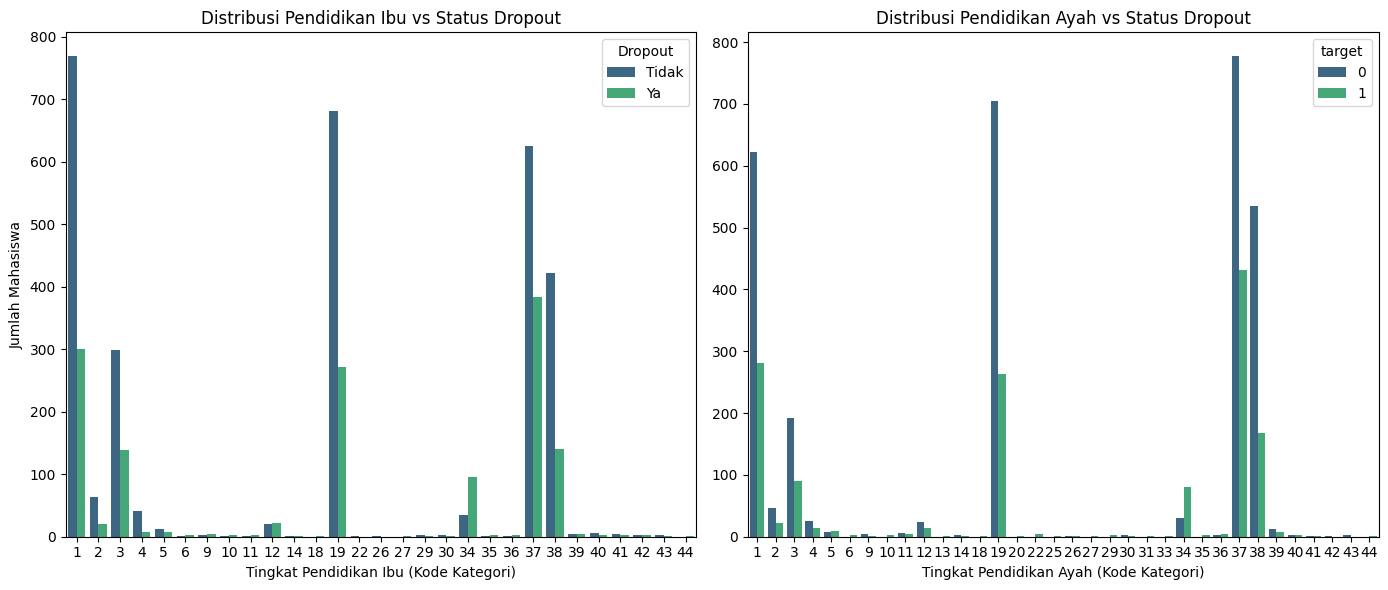

In [26]:
plt.figure(figsize=(14, 6))

# Pendidikan Ibu
plt.subplot(1, 2, 1)
sns.countplot(
    x='Mothers_qualification',
    hue='target',
    data=df,
    palette='viridis',
    order=sorted(df['Mothers_qualification'].unique())
)
plt.title('Distribusi Pendidikan Ibu vs Status Dropout')
plt.xlabel('Tingkat Pendidikan Ibu (Kode Kategori)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Dropout', labels=['Tidak', 'Ya'])

# Pendidikan Ayah
plt.subplot(1, 2, 2)
sns.countplot(
    x='Fathers_qualification',
    hue='target',
    data=df,
    palette='viridis',
    order=sorted(df['Fathers_qualification'].unique())
)
plt.title('Distribusi Pendidikan Ayah vs Status Dropout')
plt.xlabel('Tingkat Pendidikan Ayah (Kode Kategori)')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [27]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Hitung untuk pendidikan ibu
contingency_mother = pd.crosstab(df['Mothers_qualification'], df['target'])
v_mother = cramers_v(contingency_mother)
print(f"\nCramer's V Pendidikan Ibu: {v_mother:.3f}")

# Hitung untuk pendidikan ayah
contingency_father = pd.crosstab(df['Fathers_qualification'], df['target'])
v_father = cramers_v(contingency_father)
print(f"Cramer's V Pendidikan Ayah: {v_father:.3f}")


Cramer's V Pendidikan Ibu: 0.205
Cramer's V Pendidikan Ayah: 0.203


In [28]:
from scipy.stats import chi2_contingency

def calculate_chi2_pvalue(feature):
    contingency_table = pd.crosstab(df[feature], df['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

p_mother = calculate_chi2_pvalue('Mothers_qualification')
p_father = calculate_chi2_pvalue('Fathers_qualification')

print(f"\nUji Chi-Square:")
print(f"- Pendidikan Ibu vs Dropout: p-value = {p_mother:.4f}")
print(f"- Pendidikan Ayah vs Dropout: p-value = {p_father:.4f}")


Uji Chi-Square:
- Pendidikan Ibu vs Dropout: p-value = 0.0000
- Pendidikan Ayah vs Dropout: p-value = 0.0000


Cara Kerja Analisis:

1. Menentukan Faktor Penting
    - Menggunakan model Random Forest untuk mengetahui fitur (variabel) apa saja yang paling berpengaruh terhadap kemungkinan mahasiswa dropout.
2. Menganalisis Status Ekonomi
    - Melakukan uji statistik (chi-square) terhadap variabel ekonomi seperti:
      - Apakah mahasiswa membayar uang kuliah tepat waktu.
      - Apakah mahasiswa memiliki utang (Debtor).
3. Menganalisis Performa Akademik
    - Menghitung rata-rata nilai dan jumlah mata kuliah yang disetujui untuk mahasiswa yang dropout vs tidak dropout.
4. Evaluasi Model Prediksi
    - Menggunakan AUC (Area Under Curve) untuk mengukur seberapa baik model (XGBoost) bisa memprediksi dropout.

Insight

1. Faktor yang Paling Mempengaruhi Dropout:
    - Jumlah mata kuliah yang disetujui di semester 1.
    - Nilai akademik semester 1.
    - Kepatuhan membayar uang kuliah.
    - Artinya: Prestasi awal dan kondisi keuangan sangat memengaruhi kelulusan.

2. Status Ekonomi Punya Dampak Signifikan:
    - Mahasiswa yang tidak membayar tepat waktu dan yang punya utang lebih berisiko dropout.
    - Ini didukung dengan p-value < 0.05, artinya perbedaan ini secara statistik signifikan.
    
3. Performa Akademik Berpengaruh Besar:
    - Mahasiswa dropout rata-rata nilai hanya 7.3, sedangkan yang tidak dropout 12.2.
    - Hanya 2.6 mata kuliah yang disetujui oleh dropout, dibanding 5.7 pada yang tidak dropout.
  - Artinya: Mahasiswa yang nilainya rendah dan tidak banyak lulus mata kuliah di awal, cenderung lebih besar untuk berhenti.

4. Model Prediksi Sangat Akurat:
    - AUC sebesar 0.9042, berarti model sangat baik dalam membedakan siapa yang berpotensi dropout atau tidak.

Kesimpulan Sederhana:

Mahasiswa yang bermasalah secara finansial dan memiliki prestasi rendah di semester 1, sangat berisiko mengalami dropout. Sistem prediksi seperti ini bisa membantu kampus mendeteksi lebih awal dan memberikan intervensi yang tepat.

In [29]:
print("\n" + "="*50)
print("JAWABAN PROBLEM STATEMENT BERDASARKAN ANALISIS DATA")
print("="*50)

# 1. Ambil fitur penting dari Random Forest
top_features = feature_imp.sort_values('Importance', ascending=False).head(3)['Feature'].tolist()

# 2. Hitung perbedaan nilai antara dropout vs tidak
mean_grade_dropout = df[df['target']==1]['Curricular_units_1st_sem_grade'].mean()
mean_grade_non_dropout = df[df['target']==0]['Curricular_units_1st_sem_grade'].mean()
grade_diff = ((mean_grade_non_dropout - mean_grade_dropout)/mean_grade_non_dropout)*100

# 3. Hitung perbedaan jumlah mata kuliah disetujui
mean_approved_dropout = df[df['target']==1]['Curricular_units_1st_sem_approved'].mean()
mean_approved_non_dropout = df[df['target']==0]['Curricular_units_1st_sem_approved'].mean()

# 4. Ambil p-value dari uji ekonomi
chi2_debtor, p_debtor, _, _ = chi2_contingency(pd.crosstab(df['Debtor'], df['target']))
chi2_tuition, p_tuition, _, _ = chi2_contingency(pd.crosstab(df['Tuition_fees_up_to_date'], df['target']))

# 5. Tampilkan hasil yang terhubung dengan analisis
print(f"\n1. 3 Faktor Paling Berpengaruh (Berdasarkan Random Forest):")
for idx, feature in enumerate(top_features, 1):
    print(f"   {idx}. {feature}")

print(f"\n2. Status Ekonomi:")
print(f"   - Pembayaran tepat waktu {'signifikan' if p_tuition < 0.05 else 'tidak signifikan'} (p-value: {p_tuition:.4f})")
print(f"   - Status debitor {'meningkatkan' if p_debtor < 0.05 else 'tidak mempengaruhi'} risiko dropout (p-value: {p_debtor:.4f})")

print(f"\n3. Performa Akademik:")
print(f"   - Nilai dropout: {mean_grade_dropout:.1f} vs Tidak dropout: {mean_grade_non_dropout:.1f} (Perbedaan: {grade_diff:.1f}%)")
print(f"   - Mata kuliah disetujui: {mean_approved_dropout:.1f} (dropout) vs {mean_approved_non_dropout:.1f} (tidak dropout)")

print(f"\n5. Prediksi Dropout:")
print(f"   - AUC Model Terbaik: {results['XGBoost']['auc']:.4f} (Skala 0-1)")


JAWABAN PROBLEM STATEMENT BERDASARKAN ANALISIS DATA

1. 3 Faktor Paling Berpengaruh (Berdasarkan Random Forest):
   1. Curricular_units_1st_sem_approved
   2. Curricular_units_1st_sem_grade
   3. Tuition_fees_up_to_date

2. Status Ekonomi:
   - Pembayaran tepat waktu signifikan (p-value: 0.0000)
   - Status debitor meningkatkan risiko dropout (p-value: 0.0000)

3. Performa Akademik:
   - Nilai dropout: 7.3 vs Tidak dropout: 12.2 (Perbedaan: 40.7%)
   - Mata kuliah disetujui: 2.6 (dropout) vs 5.7 (tidak dropout)

5. Prediksi Dropout:
   - AUC Model Terbaik: 0.9042 (Skala 0-1)
